# Modelo de regresion multiple para predecir la cantidad El total kills por ronda en una partida TotalRoundKills_by_Match.

In [2]:
import numpy as np # Programación vectorial
import matplotlib.pyplot as plt # Visualización
import pandas as pd # Estructura y manipulación de datos
import scipy.stats as stats
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

from scipy import stats

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Raúl
url='/content/drive/MyDrive/Machine Learning/Prueba 2/Anexo ET_demo_round_traces_2022.csv'
df = pd.read_csv(url, sep=";", encoding='utf-8')


<ipython-input-4-c1990cf91c9e>:3: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, sep=";", encoding='utf-8')


In [ ]:
#Sofia
url = '/content/drive/MyDrive/Fundamentos de machine learning/Anexo ET_demo_round_traces_2022.csv'
df = pd.read_csv(url, sep=";", encoding='utf-8')


In [5]:
# Codificación de la variable 'Team'
from sklearn.preprocessing import LabelEncoder

if 'Team_encoded' not in df.columns:
    le = LabelEncoder()
    df['Team_encoded'] = le.fit_transform(df['Team'])

In [6]:
if 'MatchWinner_encoded' not in df.columns:
    le = LabelEncoder()
    df['MatchWinner_encoded'] = le.fit_transform(df['MatchWinner'])

In [7]:
print("\nInformación general del dataset:")
print(df.info())

print("\nDescripción estadística básica:")
print(df.describe())

print("\nValores nulos por columna:")
print(df.isnull().sum())


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   79157 non-null  int64  
 1   Map                          79157 non-null  object 
 2   Team                         79155 non-null  object 
 3   InternalTeamId               79157 non-null  int64  
 4   MatchId                      79157 non-null  int64  
 5   RoundId                      79157 non-null  int64  
 6   RoundWinner                  79157 non-null  object 
 7   MatchWinner                  79156 non-null  object 
 8   Survived                     79157 non-null  bool   
 9   AbnormalMatch                79157 non-null  bool   
 10  TimeAlive                    79157 non-null  object 
 11  TravelledDistance            79157 non-null  object 
 12  RLethalGrenadesThrown        79157 non-n

In [8]:
#Con esta linea de codigo podemos asegurarnos de que las variables a utilizar sean numericas
df['MatchAssists'] = pd.to_numeric(df['MatchAssists'], errors='coerce')
df['TimeAlive'] = pd.to_numeric(df['TimeAlive'], errors='coerce')
df['MatchHeadshots'] = pd.to_numeric(df['MatchHeadshots'], errors='coerce')
df['RoundKills'] = pd.to_numeric(df['RoundKills'], errors='coerce')
df['PrimarySniperRifle'] = df['PrimarySniperRifle'].round().astype(int)
df['PrimaryAssaultRifle'] = df['PrimaryAssaultRifle'].round().astype(int)
df['PrimaryHeavy'] = df['PrimaryHeavy'].round().astype(int)
df['PrimarySMG'] = df['PrimarySMG'].round().astype(int)

In [9]:
# 3.1. Imputar NaN en columnas numéricas usando la media
num_cols = df.select_dtypes(include=[np.number]).columns

for col in num_cols:
    if df[col].isnull().sum() > 0:
        mean_value = df[col].mean()
        df[col].fillna(mean_value, inplace=True)

<ipython-input-9-e2c407db1044>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_value, inplace=True)


In [10]:
# 3.2.En columnas categóricas rellenamos con el valor más frecuente
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    if df[col].isnull().sum() > 0:
        mode_value = df[col].mode()[0]
        df[col].fillna(mode_value, inplace=True)

<ipython-input-10-c24d02517d5f>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)
<ipython-input-10-c24d02517d5f>:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col].fillna(mode_value, inplace=True)


In [11]:
print("\nValores nulos por columna luego de añadir el valor segun la media:")
print(df.isnull().sum())


Valores nulos por columna luego de añadir el valor segun la media:
Unnamed: 0                     0
Map                            0
Team                           0
InternalTeamId                 0
MatchId                        0
RoundId                        0
RoundWinner                    0
MatchWinner                    0
Survived                       0
AbnormalMatch                  0
TimeAlive                      0
TravelledDistance              0
RLethalGrenadesThrown          0
RNonLethalGrenadesThrown       0
PrimaryAssaultRifle            0
PrimarySniperRifle             0
PrimaryHeavy                   0
PrimarySMG                     0
PrimaryPistol                  0
FirstKillTime                  0
RoundKills                     0
RoundAssists                   0
RoundHeadshots                 0
RoundFlankKills                0
RoundStartingEquipmentValue    0
TeamStartingEquipmentValue     0
MatchKills                     0
MatchFlankKills                0
MatchAss

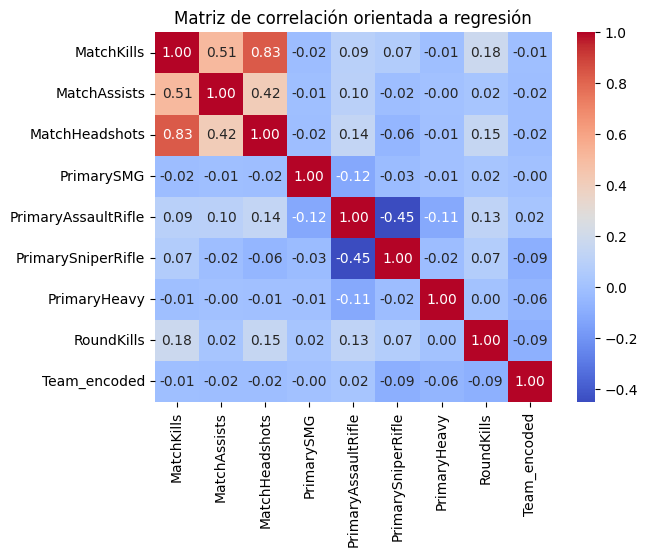

In [12]:
# Correlación entre MatchKills y otras métricas ofensivas
variables_corr = ['MatchKills', 'MatchAssists', 'MatchHeadshots','PrimarySMG','PrimaryAssaultRifle','PrimarySniperRifle','PrimaryHeavy', 'RoundKills', 'Team_encoded']
correlation_matrix = df[variables_corr].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación orientada a regresión")
plt.show()

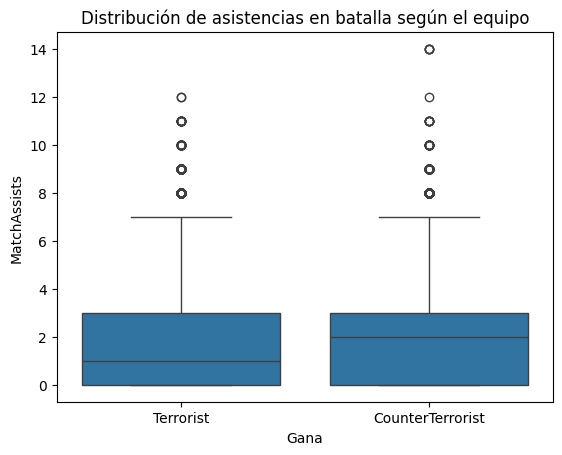

In [13]:
# Distribución de MatchAssists por equipo
sns.boxplot(x='Team', y='MatchAssists', data=df)
plt.title("Distribución de asistencias en batalla según el equipo")
plt.xlabel("Gana")
plt.ylabel("MatchAssists")
plt.show()

In [14]:
variables_a_agregar = {
    'RoundKills': 'sum',  # Suma total de kills por ronda -> MatchKills
    'RoundAssists': 'sum',  # Suma total de asistencias por ronda -> MatchAssists
    'RoundHeadshots': 'sum', # Suma total de headshots por ronda -> MatchHeadshots
    'RoundFlankKills': 'sum', # Suma total de flank kills por ronda -> MatchFlankKills
    'TimeAlive': 'mean', # Promedio de tiempo de vida por ronda para el equipo
    'TravelledDistance': 'sum', # Distancia total recorrida por el equipo en la partida
    'RLethalGrenadesThrown': 'sum', # Granadas letales totales lanzadas por el equipo
    'RNonLethalGrenadesThrown': 'sum', # Granadas no letales totales lanzadas por el equipo
    'RoundStartingEquipmentValue': 'mean', # Valor promedio del equipo inicial por ronda
    'PrimarySMG': 'sum', # Suma total del "uso" de SMG (depende de cómo se mida el "uso")
    'PrimaryAssaultRifle': 'sum', # Suma total del "uso" de Rifles de Asalto
    'PrimarySniperRifle': 'sum', # Suma total del "uso" de Rifles de Francotirador
    'PrimaryHeavy': 'sum', # Suma total del "uso" de Armas Pesadas
    'PrimaryPistol': 'sum', # Suma total del "uso" de Pistolas
}

# 2. Agrupar por MatchId y aplicar las funciones de agregación
df_partida_agregado = df.groupby('MatchId').agg(variables_a_agregar)

# Renombrar columnas para reflejar que ahora son a nivel de partida
df_partida_agregado = df_partida_agregado.rename(columns={
    'RoundKills': 'TotalKills_X_Match',
    'RoundAssists': 'TotalRoundAssists_by_Match',
    'RoundHeadshots': 'TotalRoundHeadshots_by_Match',
    'RoundFlankKills': 'TotalRoundFlankKills_by_Match',
    'TimeAlive': 'TimeAlive_by_Match',
    'TravelledDistance': 'TotalTravelledDistance_by_Match',
    'RLethalGrenadesThrown': 'TotalLethalGrenades_by_Match',
    'RNonLethalGrenadesThrown': 'TotalNonLethalGrenades_by_Match',
    'RoundStartingEquipmentValue': 'RoundEquipmentValue_by_Match',
    'PrimarySMG': 'TotalPrimarySMG_Use_by_Match',
    'PrimaryAssaultRifle': 'TotalPrimaryAssaultRifle_Use_by_Match',
    'PrimarySniperRifle': 'TotalPrimarySniperRifle_Use_by_Match',
    'PrimaryHeavy': 'TotalPrimaryHeavy_Use_by_Match',
    'PrimaryPistol': 'TotalPrimaryPistol_Use_by_Match',
})

# 3. Resetear el índice
df_partida_agregado = df_partida_agregado.reset_index()

# Selecciona de columnas de nivel de partida únicas por MatchId
df_info_partida = df[['MatchId', 'MatchWinner', 'Map', 'Team', 'AbnormalMatch']].drop_duplicates(subset=['MatchId'])

df_final_partida = pd.merge(df_partida_agregado, df_info_partida, on='MatchId')

# Ahora df_final_partida tiene una fila por partida con todas las variables agregadas y de nivel de partida

print(df_final_partida.head())
print(df_final_partida.columns)

   MatchId  TotalKills_X_Match  TotalRoundAssists_by_Match  \
0        4                 151                          25   
1        6                  27                           1   
2        9                 167                          36   
3       10                 163                          41   
4       11                  46                          14   

   TotalRoundHeadshots_by_Match  TotalRoundFlankKills_by_Match  \
0                            71                             18   
1                            18                             13   
2                            83                             19   
3                            73                             13   
4                            18                              6   

   TimeAlive_by_Match                    TotalTravelledDistance_by_Match  \
0          281.343109  10.083.140.737.457.00060.960.883.184.688.4005....   
1          185.792619  5.504.600.594.504.4500.00.00.00.00.00.010.023....   
2 

In [15]:
# Después de crear df_final_partida
X = df_final_partida[['TotalRoundAssists_by_Match',
                      'TotalRoundHeadshots_by_Match',
                      'TimeAlive_by_Match',
                      'TotalPrimarySMG_Use_by_Match',
                      'TotalPrimaryAssaultRifle_Use_by_Match',
                      'TotalPrimarySniperRifle_Use_by_Match',
                      'TotalPrimaryHeavy_Use_by_Match',
                      'TotalPrimaryPistol_Use_by_Match'
                     ]].copy()
y = df_final_partida['TotalKills_X_Match']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Entrenar el modelo SVR
# Se recomienda escalar los datos antes de usar SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr_model = SVR(kernel='linear')
svr_model.fit(X_train_scaled, y_train)

# Realizar predicciones
y_pred_svr = svr_model.predict(X_test_scaled)

# Evaluar el modelo
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)

print(f'Mean Squared Error (SVR): {mse_svr}')
print(f'Root Mean Squared Error (SVR): {rmse_svr}')
print(f'R-squared (SVR): {r2_svr}')
print(f'Mean Absolute Error (SVR): {mae_svr}')

Mean Squared Error (SVR): 37.43284571057529
Root Mean Squared Error (SVR): 6.118238775217529
R-squared (SVR): 0.9435760148783745
Mean Absolute Error (SVR): 4.987116121710422


 MSE de 37.43 indica que, en promedio, el error al cuadrado de las predicciones es de aproximadamente 37.43.

 Un RMSE de 6.11 significa que, en promedio, las predicciones del modelo se desvían de los valores reales en aproximadamente 6.11 kills por partida.

 Esto indica que el 94.35% de la variabilidad en la cantidad total de kills por partida ('TotalKills_X_Match') puede ser explicada por las variables predictoras que incluiste en el modelo.

 El MAE de 4.98 indica que, en promedio, la magnitud del error de las predicciones es de aproximadamente 4.98 kills por partida. A diferencia del MSE y RMSE, el MAE no penaliza tanto los errores grandes.


# Prediccion de tiempo vivo segun cantidad de kills

In [25]:
# --- Limpiar la columna 'TravelledDistance' en el DataFrame original (df) ---
# Convertir a string por si acaso no lo es
df['TravelledDistance'] = df['TravelledDistance'].astype(str)

# Eliminar los puntos (que parecen ser separadores de miles incorrectos)
# Usa regex=False para eliminar puntos literales
df['TravelledDistance'] = df['TravelledDistance'].str.replace('.', '', regex=False)

# Convertir a tipo numérico. Usa errors='coerce' para manejar valores que no se puedan convertir
df['TravelledDistance'] = pd.to_numeric(df['TravelledDistance'], errors='coerce')

# 2. Imputar la media o mediana:
mean_distance = df['TravelledDistance'].mean()
df['TravelledDistance'].fillna(mean_distance, inplace=True)
#------------------------------------------------------------------------------------------------------
# realizar la agregación con la columna limpia
variables_a_agregar = {
    'TravelledDistance': 'sum', # Ahora esta columna es numérica en df
    'RoundKills': 'sum'
}

# 2. Agrupar por MatchId y aplicar las funciones de agregación
df_partida_agregado = df.groupby('MatchId').agg(variables_a_agregar)

# Renombrar columnas para reflejar que ahora son a nivel de partida
df_partida_agregado = df_partida_agregado.rename(columns={
    'RoundKills': 'TotalKills_X_Match',
    'TravelledDistance': 'TotalTravelledDistance_by_Match',
})

# 3. Resetear el índice
df_partida_agregado = df_partida_agregado.reset_index()

# Selecciona de columnas de nivel de partida únicas por MatchId
df_info_partida = df[['MatchId', 'MatchWinner', 'Map', 'Team', 'AbnormalMatch']].drop_duplicates(subset=['MatchId'])

df_final_partida = pd.merge(df_partida_agregado, df_info_partida, on='MatchId')
#--------------------------------------------------------------------------------------------------------------------------------------
# Ahora df_final_partida tiene una fila por partida con las variables agregadas limpias
print(df_final_partida.head())
print(df_final_partida.columns)

# --- Ahora sí puedes usar df_final_partida para definir X y y y entrenar el modelo ---

# Definir X y y para la regresión simple
X_simple_travel = df_final_partida[['TotalTravelledDistance_by_Match']].copy() # Ahora esta columna debe ser numérica
y_simple_travel = df_final_partida['TotalKills_X_Match']

# Dividir los datos
X_train_simple_travel, X_test_simple_travel, y_train_simple_travel, y_test_simple_travel = train_test_split(
    X_simple_travel, y_simple_travel, test_size=0.2, random_state=60
)


   MatchId  TotalTravelledDistance_by_Match  TotalKills_X_Match  MatchWinner  \
0        4                     1.549740e+32                 151         True   
1        6                     2.831691e+31                  27         True   
2        9                     2.245823e+32                 167        False   
3       10                     1.669112e+32                 163        False   
4       11                     6.123119e+31                  46        False   

          Map       Team  AbnormalMatch  
0  de_inferno  Terrorist          False  
1     de_nuke  Terrorist          False  
2  de_inferno  Terrorist          False  
3   de_mirage  Terrorist          False  
4   de_mirage  Terrorist          False  
Index(['MatchId', 'TotalTravelledDistance_by_Match', 'TotalKills_X_Match',
       'MatchWinner', 'Map', 'Team', 'AbnormalMatch'],
      dtype='object')


<ipython-input-25-dbd71cf291d4>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TravelledDistance'].fillna(mean_distance, inplace=True)


In [26]:
# Entrenar el modelo SVR
# Se recomienda escalar los datos antes de usar SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr_model = SVR(kernel='linear')
svr_model.fit(X_train_scaled, y_train)

# Realizar predicciones
y_pred_svr = svr_model.predict(X_test_scaled)

# Evaluar el modelo
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)

print(f'Mean Squared Error (SVR): {mse_svr}')
print(f'Root Mean Squared Error (SVR): {rmse_svr}')
print(f'R-squared (SVR): {r2_svr}')
print(f'Mean Absolute Error (SVR): {mae_svr}')

Mean Squared Error (SVR): 37.43284571057529
Root Mean Squared Error (SVR): 6.118238775217529
R-squared (SVR): 0.9435760148783745
Mean Absolute Error (SVR): 4.987116121710422


#Equipamiento y desempeño

In [29]:
variables_a_agregar = {
    'RoundKills': 'sum',  # Suma total de kills por ronda -> MatchKills
    'RoundStartingEquipmentValue': 'mean', # Valor promedio del equipo inicial por ronda
}

# 2. Agrupar por MatchId y aplicar las funciones de agregación
df_partida_agregado = df.groupby('MatchId').agg(variables_a_agregar)

# Renombrar columnas para reflejar que ahora son a nivel de partida
df_partida_agregado = df_partida_agregado.rename(columns={
    'RoundKills': 'TotalKills_X_Match',
    'RoundStartingEquipmentValue': 'RoundEquipmentValue_by_Match',
})
# 3. Resetear el índice
df_partida_agregado = df_partida_agregado.reset_index()

# Selecciona de columnas de nivel de partida únicas por MatchId
df_info_partida = df[['MatchId', 'MatchWinner', 'Map', 'Team', 'AbnormalMatch']].drop_duplicates(subset=['MatchId'])

df_final_partida = pd.merge(df_partida_agregado, df_info_partida, on='MatchId')

# Ahora df_final_partida tiene una fila por partida con todas las variables agregadas y de nivel de partida

print(df_final_partida.head())
print(df_final_partida.columns)

   MatchId  TotalKills_X_Match  RoundEquipmentValue_by_Match  MatchWinner  \
0        4                 151                   3735.000000         True   
1        6                  27                   1579.245283         True   
2        9                 167                   3648.600000        False   
3       10                 163                   3726.400000        False   
4       11                  46                   3495.000000        False   

          Map       Team  AbnormalMatch  
0  de_inferno  Terrorist          False  
1     de_nuke  Terrorist          False  
2  de_inferno  Terrorist          False  
3   de_mirage  Terrorist          False  
4   de_mirage  Terrorist          False  
Index(['MatchId', 'TotalKills_X_Match', 'RoundEquipmentValue_by_Match',
       'MatchWinner', 'Map', 'Team', 'AbnormalMatch'],
      dtype='object')


In [30]:
# Definir X y y para la regresión simple
X_simple_equipment = df_final_partida[['RoundEquipmentValue_by_Match']].copy() # X debe ser un DataFrame
y_simple_equipment = df_final_partida['TotalKills_X_Match'] # Tu variable objetivo a nivel de partida

# Dividir los datos (usamos el mismo random_state para consistencia con otras comparaciones)
X_train_simple_equipment, X_test_simple_equipment, y_train_simple_equipment, y_test_simple_equipment = train_test_split(
    X_simple_equipment, y_simple_equipment, test_size=0.2, random_state=50
)

# Entrenar el modelo de Regresión Lineal Simple
lr_simple_equipment_model = LinearRegression()
lr_simple_equipment_model.fit(X_train_simple_equipment, y_train_simple_equipment)

# Realizar predicciones en el conjunto de prueba
y_pred_simple_equipment = lr_simple_equipment_model.predict(X_test_simple_equipment)



In [31]:
# Entrenar el modelo SVR
# Se recomienda escalar los datos antes de usar SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr_model = SVR(kernel='linear')
svr_model.fit(X_train_scaled, y_train)

# Realizar predicciones
y_pred_svr = svr_model.predict(X_test_scaled)

# Evaluar el modelo
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)

print(f'Mean Squared Error (SVR): {mse_svr}')
print(f'Root Mean Squared Error (SVR): {rmse_svr}')
print(f'R-squared (SVR): {r2_svr}')
print(f'Mean Absolute Error (SVR): {mae_svr}')

Mean Squared Error (SVR): 37.43284571057529
Root Mean Squared Error (SVR): 6.118238775217529
R-squared (SVR): 0.9435760148783745
Mean Absolute Error (SVR): 4.987116121710422
